# Initialize Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import itertools
import math
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from typing import Dict, Any
from abc import ABC,abstractmethod
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.utils import check_random_state
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,mean_absolute_error,mean_squared_error,r2_score,make_scorer,f1_score

In [2]:
#Load the dataset

test1 = pd.read_csv("test.csv")
train1 = pd.read_csv("train.csv")
test = pd.read_csv("test1.csv")
train = pd.read_csv("train1.csv")

C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print('test \n', pd.DataFrame(test.isnull().sum()))

test 
                       0
tBodyAcc-mean()-X     0
tBodyAcc-mean()-Y     0
tBodyAcc-mean()-Z     0
tBodyAcc-std()-X      0
tBodyAcc-std()-Y      0
...                  ..
angle(X,gravityMean)  0
angle(Y,gravityMean)  0
angle(Z,gravityMean)  0
subject               0
Activity              0

[563 rows x 1 columns]


In [4]:
train.shape

(7352, 563)

In [5]:
train1.shape

(7767, 562)

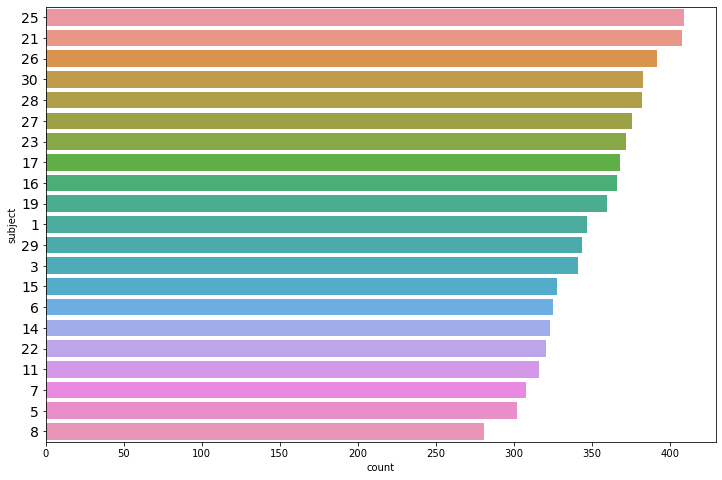

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(y='subject',data=train,order=train['subject'].value_counts().index[:30])
plt.yticks(size=14)
plt.show()

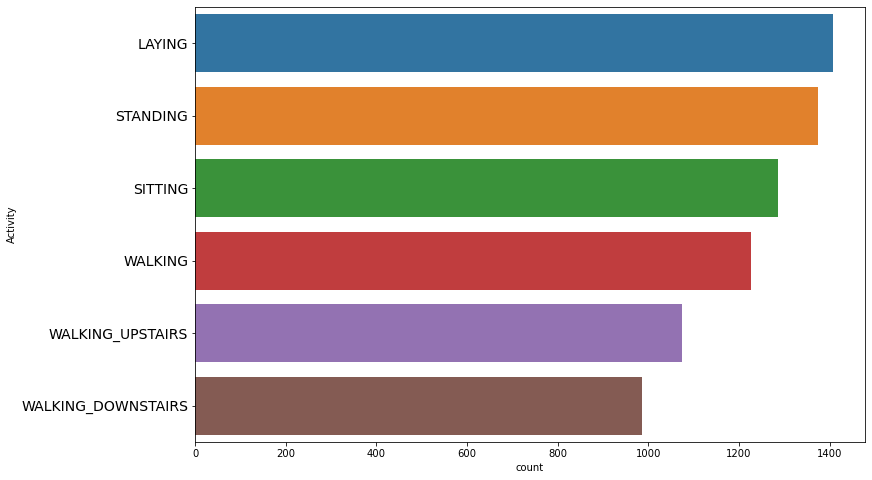

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(y='Activity',data=train,order=train['Activity'].value_counts().index[:30])
plt.yticks(size=14)
plt.show()

In [8]:
train.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

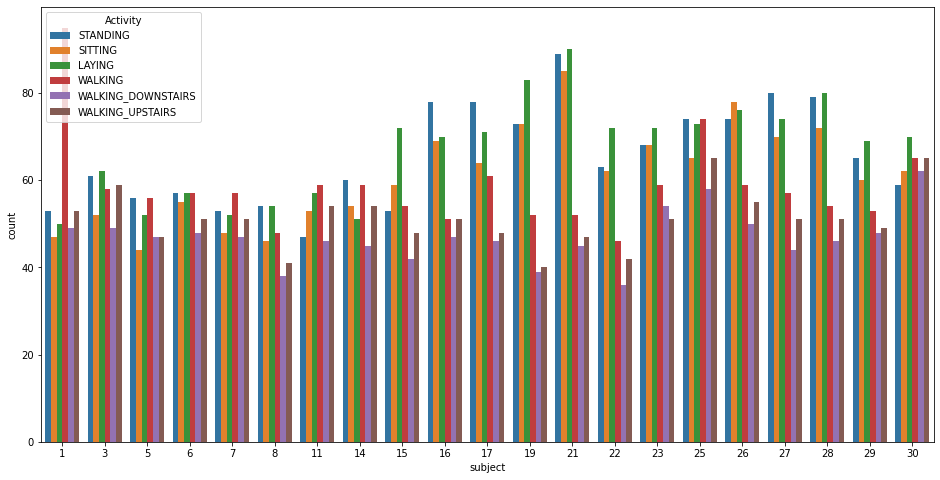

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

<AxesSubplot:title={'center':'Dynamic Activities(zoom in)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

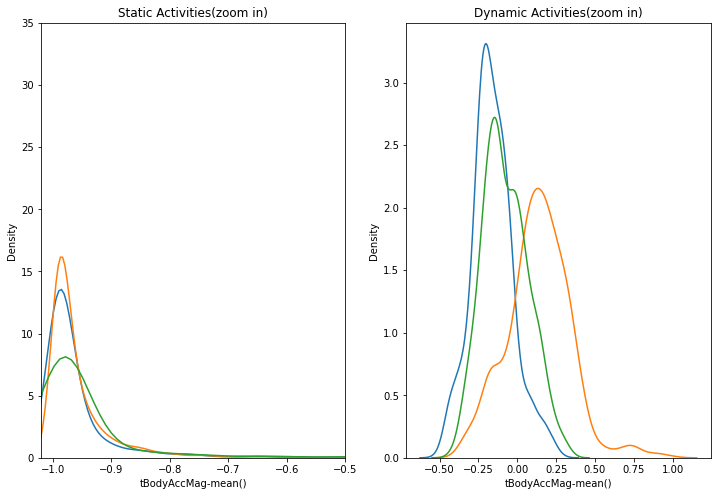

In [10]:
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(zoom in)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False)
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False)
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False)
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(zoom in)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False)
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False)
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False)

C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Min-2700\.conda\envs\Min_2700\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Min-2700\.conda\envs\Min_2700\

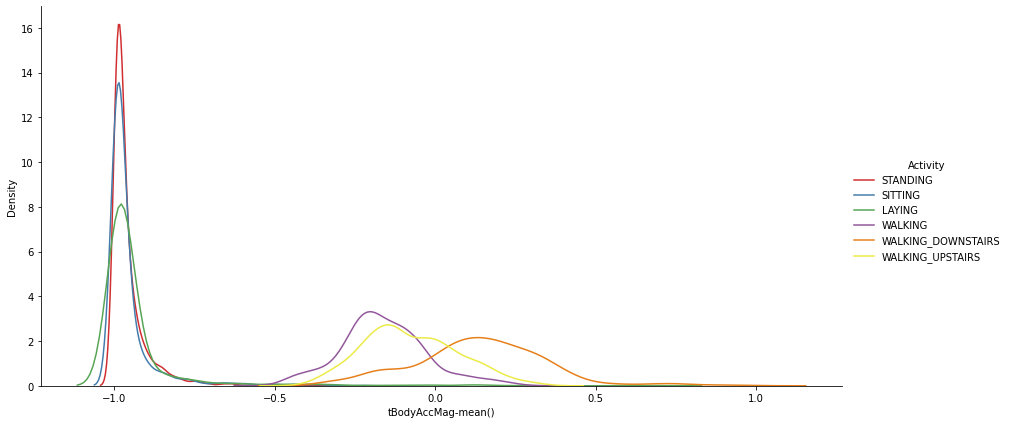

In [11]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

In [12]:
train.Activity.replace(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'],[1,2,3,4,5,6],inplace=True)

In [13]:
feature_update = list(train.columns)
feature_update.pop(-1)

'Activity'

In [14]:
feature_update

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [15]:
import operator

In [27]:
for i in range(len(feature_update)):
    if feature_update[i].__contains__('X') or feature_update[i].__contains__('Y') or feature_update[i].__contains__('Z'):
        del feature_update[i]
        print(len(feature_update))
print(feature_update)

['tBodyAcc-sma()', 'tGravityAcc-sma()', 'tBodyAccJerk-sma()', 'tBodyGyro-sma()', 'tBodyGyroJerk-sma()', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tBodyAccMag-arCoeff()1', 'tBodyAccMag-arCoeff()2', 'tBodyAccMag-arCoeff()3', 'tBodyAccMag-arCoeff()4', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-arCoe

In [36]:
for i in range(len(feature_update)):
    if feature_update[i].__contains__('1') or feature_update[i].__contains__('2') or feature_update[i].__contains__('3') or feature_update[i].__contains__('3') or feature_update[i].__contains__('4') or feature_update[i].__contains__('5') or feature_update[i].__contains__('6'):
        del feature_update[i]
        print(len(feature_update))
print(feature_update)

['tBodyAcc-sma()', 'tGravityAcc-sma()', 'tBodyAccJerk-sma()', 'tBodyGyro-sma()', 'tBodyGyroJerk-sma()', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tBodyAccMag-mad()', 'tBodyAccMag-max()', 'tBodyAccMag-min()', 'tBodyAccMag-sma()', 'tBodyAccMag-energy()', 'tBodyAccMag-iqr()', 'tBodyAccMag-entropy()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()', 'tGravityAccMag-sma()', 'tGravityAccMag-energy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-iqr()', 'tBodyAccJerkMag-entropy()', 'tBodyGyroMag-mean()', 'tBodyGyroMag-std()', 'tBodyGyroMag-mad()', 'tBodyGyroMag-max()', 'tBodyGyroMag-min()', 'tBodyGyroMag-sma()', 'tBodyGyroMag-energy()', 'tBodyGyroMag-iqr()', 'tBodyGyroMag-entropy()', 'tBodyGyroJerkMag-mean()', 'tBodyGyr

In [37]:
len(feature_update)

110

In [119]:
# train_test split
X, y = train.drop(columns=["Activity"]).values, train["Activity"].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state=1)

In [40]:
# SVM

In [41]:
def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w


class SVMC(BaseEstimator, ClassifierMixin):

    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose

    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g

    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue

            smallest = min(smallest, g[k])

        return g.max() - smallest

    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]

        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)

        return Ci - self.dual_coef_[:, i] - beta / norms[i]

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)

        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))

        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))

        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)

        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0

            for ii in range(n_samples):
                i = ind[ii]

                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue

                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v

                if v < 1e-12:
                    continue

                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)

                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta

            if it == 0:
                violation_init = violation_sum

            vratio = violation_sum / violation_init

            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))

            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break

        return self

    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

In [42]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0,-1, 1)
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [43]:
smodel = SVMC()
smodel.fit(X_train, y_train)

SVMC(tol=(0.05,))

In [44]:
sy_predict = smodel.predict(X_train)

In [45]:
accuracy_score(y_train, sy_predict)

0.985206597517429

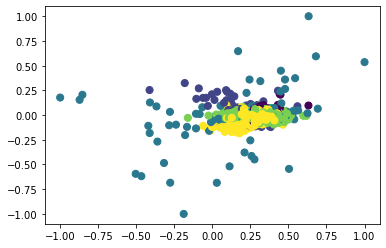

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [49]:
# Logistic Regression
class LogisticRegression():
    """
    Class for logisttic regression
    """

    def __init__(self, lr=0.001, epochs=1000):
        """
        Logistic Regression Constructor

        Args:
            lr (float, optional): _description_. Defaults to 0.001.
            epochs (int, optional): _description_. Defaults to 1000.
        """
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        
    def loss_function(self,x):
        """
        Sigmoid loss function

        Args:
            x (_type_): Z value(mx+b)

        Returns:
            _type_: Probability
        """
        return 1/(1+np.exp(-x))
    
    def fit(self, X, y):
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Response variable
        """
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for _ in range(self.epochs):
            linear_pred = np.dot(X, self.w) + self.b
            pred = self.loss_function(linear_pred)

            dw = (1/n) * np.dot(X.T, (pred - y))
            db = (1/n) * np.sum(pred-y)

            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db

    def predict(self, X):
        """
        Predict the Y

        Args:
            X (_type_): _description_

        Returns:
            _type_: Y-hat probability
        """
        linear_pred = np.dot(X, self.w) + self.b
        y_pred = self.loss_function(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
lr_model = LogisticRegression(lr=0.001)
lr_model.fit(X_train, y_train)

In [52]:
lr_predict = lr_model.predict(X_train)

In [53]:
accuracy_score(y_train, lr_predict)

0.0

In [63]:
#pick features again
X = train[train.columns.intersection(feature_update)]
y = train["Activity"].values

In [64]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state=1)

In [66]:
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

Shape of train set is (5881, 110)
Shape of test set is (1471, 110)
Shape of train label is (5881,)
Shape of test labels is (1471,)


In [67]:
lr_model = LogisticRegression(lr=0.001)
lr_model.fit(X_train, y_train)

In [68]:
lr_predict = lr_model.predict(X_train)

In [69]:
accuracy_score(y_train, lr_predict)

0.0

----

In [140]:
X = train[train.columns.intersection(feature_update)]
y = train["Activity"]
keys = y.unique().tolist()
keys = np.array(keys)
keys

array([1, 2, 3, 4, 5, 6])

In [141]:
X=(X-X.min())/(X.max()-X.min())
X

,tBodyAcc-sma(),tGravityAcc-sma(),tBodyAccJerk-sma(),tBodyGyro-sma(),tBodyGyroJerk-sma(),tBodyAccMag-mean(),tBodyAccMag-std(),tBodyAccMag-mad(),tBodyAccMag-max(),tBodyAccMag-min(),...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",subject
0,0.017239,0.312287,0.003239,0.016408,0.002773,0.020283,0.024724,0.021004,0.026847,0.003722,...,0.064347,0.000000,0.475511,0.350991,0.147940,0.437030,0.515200,0.267793,0.491741,0.0
1,0.009035,0.308285,0.004303,0.009693,0.002351,0.010355,0.011971,0.010876,0.010644,0.002334,...,0.000000,0.000000,0.594891,0.201676,0.070666,0.521131,0.496283,0.133774,0.853429,0.0
2,0.008261,0.299199,0.005926,0.011860,0.003293,0.008148,0.005990,0.005837,0.006752,0.002334,...,0.000000,0.225806,0.726616,0.304605,0.122488,0.434094,0.588950,0.550707,0.906041,0.0
3,0.006953,0.299861,0.003566,0.008852,0.002252,0.006729,0.006789,0.006785,0.006752,0.001478,...,0.022152,0.032258,0.721515,0.442374,0.264192,0.475464,0.493554,0.820538,0.257822,0.0
4,0.003673,0.299762,0.003084,0.007369,0.002061,0.003586,0.004362,0.004415,0.004519,0.001478,...,0.000000,0.032258,0.558768,0.324393,0.153612,0.556466,0.561271,0.847339,0.192392,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.500349,0.297434,0.295523,0.493421,0.201627,0.484141,0.453156,0.381782,0.500013,0.155107,...,0.655418,0.048387,0.477651,0.205011,0.061044,0.397729,0.914859,0.603878,0.287755,1.0
7348,0.479345,0.320533,0.288338,0.491029,0.193772,0.467372,0.425730,0.361936,0.465216,0.202040,...,0.603965,0.048387,0.598582,0.304610,0.163047,0.526914,0.937840,0.060523,0.701485,1.0
7349,0.504017,0.311487,0.298447,0.532358,0.187039,0.498032,0.420649,0.361253,0.458384,0.202040,...,0.579468,0.048387,0.613877,0.514134,0.355582,0.520791,0.366638,0.932807,0.852256,1.0
7350,0.510005,0.279975,0.274658,0.511688,0.175553,0.498777,0.407140,0.349625,0.450974,0.264138,...,0.605035,0.048387,0.520812,0.533662,0.334993,0.442795,0.850370,0.968966,0.205664,1.0


In [142]:
dict = {}
for i in range(len(keys)):
    dict[keys[i]]=i

In [143]:
X = np.array(X).astype(float)
y = np.array([dict[i] for i in y]).astype(int)
nc = len(keys)

In [144]:
X.shape

(7352, 110)

In [145]:
y.shape

(7352,)

In [146]:
m=len(X[0])
n=len(X)

In [147]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2,random_state=1)

In [148]:
def l2_norm(a, b):
    s=0
    for p in range(len(a)):
            s= s + (a[p] - b[p])**2
    return s

def kmeans(x,n_cluster):
    
    m=len(x[0])
    n=len(x)
    pred=np.zeros((n), dtype=int)

    kcase=0
    while(True):
        kcase+=1
        print("kcase =",kcase)
        if(kcase>1):
            centre = np.zeros((n_cluster,m) )
            n_points= np.zeros(n_cluster)
            for i in range(n):
                n_points[pred[i]]+=1
                centre[pred[i]]+=x[i]
            for i in range(n_cluster):
                if(n_points[i]>0):
                    centre[i]/=n_points[i]

                    flag=False

            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                if(pred[i]!=minj):
                    pred[i]=minj
                    flag=True
            if(flag==False):
                break
        else:
            centre = np.zeros((n_cluster,m) )

            for j in range(m):
                minj = min(x[:, j])
                maxj = max(x[:, j])
                rangej = float(maxj-minj)
                centre[: ,j]=minj+rangej*np.random.rand(n_cluster) 
        
            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                pred[i]=minj
            
    return pred

In [149]:
colors=['b','g','c','r','m','y','k','w']

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10
kcase = 11
kcase = 12
kcase = 13
kcase = 14
kcase = 15
kcase = 16
kcase = 17
kcase = 18
kcase = 19
kcase = 20
kcase = 21
kcase = 22


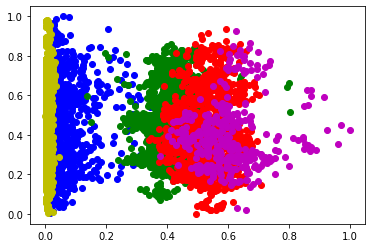

In [150]:
pred=kmeans(X,nc)
for i in range(nc):
    plt.scatter(X[np.where(pred==i)][:,0], X[np.where(pred==i)][:,1], c=colors[i]) 

---------

In [151]:
hmap=np.zeros((nc,nc))
for i in range(n): hmap[y[i]][pred[i]]+=1

print(hmap)

[[542.   2.   0.   0.   0. 830.]
 [395.   2.   0.   0.   0. 889.]
 [497.  27.   0.   2.   0. 881.]
 [  0. 717.   0. 420.  89.   0.]
 [  0. 108.   0. 618. 260.   0.]
 [  0. 721.   0. 339.  13.   0.]]


Text(33.0, 0.5, 'True label')

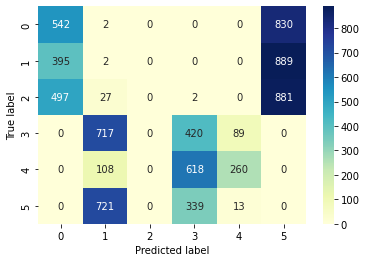

In [152]:
sns.heatmap(pd.DataFrame(hmap), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [153]:
t1 = time.time()

In [154]:
def cov_mat(x):
    m = x.shape[0]
    x = x - np.mean(x, axis=0)
    return 1 / m * np.matmul(x.T, x)

def PCA(x, n_components):
    cov_matrix = cov_mat(x)
    eigval, eigvec = np.linalg.eig(cov_matrix)
    
    idx = eigval.argsort()[::-1]
    eigvec = eigvec[:, idx]
    eigvec = eigvec[:, :n_components]
    
    ans = np.matmul(x, eigvec)
    return ans

In [155]:
x_pca = PCA(X, 10)
x_pca=x_pca.real
x_pca

array([[ 0.34530767,  0.64955438,  0.15127487, ..., -0.66102433,
        -0.20438599,  0.51204313],
       [ 0.22151415,  0.36533651,  0.00890395, ..., -0.95834253,
        -0.05732549,  0.46687115],
       [ 0.19448273,  0.10228369,  0.22644754, ..., -1.07533469,
        -0.13190522,  0.52480698],
       ...,
       [ 3.58589747,  1.01660096, -0.47066519, ..., -0.9769702 ,
         0.10274897,  0.68926096],
       [ 3.43458932,  0.94123078, -0.41335916, ..., -0.58170724,
        -0.58144906,  0.62347264],
       [ 3.44021175,  0.67248527, -0.6828811 , ..., -0.29205902,
        -0.33454747,  0.46813536]])

In [156]:
x1 = x_pca[:, 0]
x2 = x_pca[:, 1]

In [157]:
pred_pca=kmeans(x_pca,nc)

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10
kcase = 11
kcase = 12
kcase = 13
kcase = 14
kcase = 15
kcase = 16
kcase = 17
kcase = 18
kcase = 19
kcase = 20
kcase = 21
kcase = 22
kcase = 23
kcase = 24
kcase = 25
kcase = 26
kcase = 27


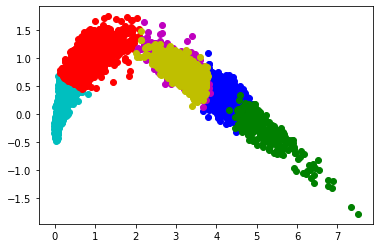

In [158]:
for i in range(nc):
    plt.scatter(x1[np.where(pred_pca==i)], x2[np.where(pred_pca==i)], c=colors[i]) 

In [159]:
acc=np.zeros(nc)
for _k in range(nc):
    TN = TP = FN = FP = 0
    for i in range(nc): #predict
        for j in range(nc): #labels
            val=hmap[j][i]
            if (i==_k and j==_k): TN=TN+val
            if (i==_k and j!=_k): FN=FN+val
            if (i!=_k and j==_k): FP=FP+val
            if (i!=_k and j!=_k): TP=TP+val
    acc[_k] = (TP+TN)/(TP+TN+FP+FN)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


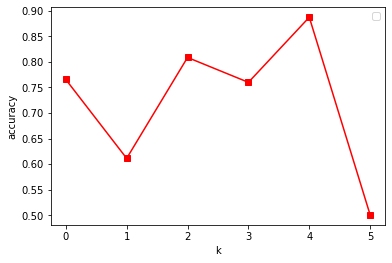

In [161]:
plt.plot(range(nc),acc,'s-',color = 'r')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend(loc = "best")
plt.show()

In [160]:
acc

array([0.76550598, 0.61112622, 0.8086235 , 0.75992927, 0.88737758,
       0.50040805])